# 1. Importing the necessary libraries  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing

# 2. Data Loading

## 2.1 Reading the CSV files

In [2]:
resale_00_12 = pd.read_csv('resale/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
resale_12_14 = pd.read_csv('resale/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
resale_15_16 = pd.read_csv('resale/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
resale_17_22 = pd.read_csv('resale/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

#### After reading the CSV files, I use `.head()` and `.info()` to get a quick understanding of the data. 

In [3]:
resale_00_12.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
308152,2009-12,PASIR RIS,4 ROOM,274,PASIR RIS ST 21,07 TO 09,107.0,Model A,1994,322000.0
343464,2010-12,SEMBAWANG,4 ROOM,480,SEMBAWANG DR,13 TO 15,90.0,Model A,2000,365388.0
61607,2001-09,PASIR RIS,4 ROOM,573,PASIR RIS ST 53,16 TO 18,110.0,Model A,1995,321000.0
86354,2002-05,CHOA CHU KANG,4 ROOM,637,CHOA CHU KANG NTH 6,10 TO 12,113.0,Premium Apartment,1998,289000.0
189254,2005-09,SENGKANG,5 ROOM,192C,RIVERVALE DR,13 TO 15,115.0,Improved,2000,303000.0
134418,2003-11,TOA PAYOH,3 ROOM,109,POTONG PASIR AVE 1,04 TO 06,74.0,Model A,1984,175000.0
356191,2011-07,BEDOK,4 ROOM,34,BEDOK STH AVE 2,10 TO 12,90.0,Improved,1977,406000.0
211211,2006-07,BEDOK,EXECUTIVE,10D,BEDOK STH AVE 2,22 TO 24,145.0,Apartment,1995,475000.0
183668,2005-07,JURONG WEST,3 ROOM,215,BOON LAY PL,07 TO 09,75.0,Improved,1974,160000.0
56569,2001-07,YISHUN,4 ROOM,868,YISHUN ST 81,04 TO 06,84.0,Simplified,1987,175000.0


In [4]:
resale_00_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                369651 non-null  object 
 1   town                 369651 non-null  object 
 2   flat_type            369651 non-null  object 
 3   block                369651 non-null  object 
 4   street_name          369651 non-null  object 
 5   storey_range         369651 non-null  object 
 6   floor_area_sqm       369651 non-null  float64
 7   flat_model           369651 non-null  object 
 8   lease_commence_date  369651 non-null  int64  
 9   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.2+ MB


In [5]:
resale_12_14.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0
5,2012-03,ANG MO KIO,3 ROOM,154,ANG MO KIO AVE 5,01 TO 05,68.0,New Generation,1981,321000.0
6,2012-03,ANG MO KIO,3 ROOM,110,ANG MO KIO AVE 4,01 TO 05,67.0,New Generation,1978,323000.0
7,2012-03,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1979,325000.0
8,2012-03,ANG MO KIO,3 ROOM,476,ANG MO KIO AVE 10,11 TO 15,67.0,New Generation,1979,328000.0
9,2012-03,ANG MO KIO,3 ROOM,631,ANG MO KIO AVE 4,01 TO 05,67.0,New Generation,1985,330000.0


In [6]:
resale_15_16.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [7]:
resale_17_22.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


## 2.2 Obtaining data from the time frame I'm interested in (2011 to 2021)

In [8]:
# exclude data from 2000 to 2010, keep only data from 2011 to 2012
df_2012 = resale_00_12[resale_00_12['month'].str.contains('2011|2012')]
df_2012

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
344182,2011-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,01 TO 03,45.0,Improved,1986,230000.0
344183,2011-01,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,01 TO 03,44.0,Improved,1978,220000.0
344184,2011-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,328000.0
344185,2011-01,ANG MO KIO,3 ROOM,208,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,333000.0
344186,2011-01,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1977,308000.0
...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0
369647,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0
369648,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0


In [9]:
# exclude data from 2022
df_2021 = resale_17_22[~resale_17_22['month'].str.contains('2022')]
df_2021

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
116677,2021-12,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,65 years,690000.0
116678,2021-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,64 years 10 months,655000.0
116679,2021-12,YISHUN,EXECUTIVE,877,YISHUN ST 81,01 TO 03,142.0,Apartment,1987,65 years 01 month,738000.0
116680,2021-12,YISHUN,EXECUTIVE,824,YISHUN ST 81,04 TO 06,146.0,Maisonette,1987,65 years,755000.0


#### After selecting the specific rows I am interested in, I concatenate the different DataFrames to put all the data from 2011 to 2021 together. 

In [10]:
df_resale = pd.concat([df_2012, resale_12_14, resale_15_16, df_2021], ignore_index = True)
df_resale

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2011-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,01 TO 03,45.0,Improved,1986,230000.0,NaN
1,2011-01,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,01 TO 03,44.0,Improved,1978,220000.0,NaN
2,2011-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,328000.0,NaN
3,2011-01,ANG MO KIO,3 ROOM,208,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,333000.0,NaN
4,2011-01,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1977,308000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
231502,2021-12,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,690000.0,65 years
231503,2021-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,655000.0,64 years 10 months
231504,2021-12,YISHUN,EXECUTIVE,877,YISHUN ST 81,01 TO 03,142.0,Apartment,1987,738000.0,65 years 01 month
231505,2021-12,YISHUN,EXECUTIVE,824,YISHUN ST 81,04 TO 06,146.0,Maisonette,1987,755000.0,65 years


# 3. Data Cleaning

## 3.1 `month`  column

#### The year and month are provided in the month column. I will split them into separate columns and also convert the values to int data type. 

In [11]:
df_resale[['year', 'mth']] = df_resale['month'].str.split("-", expand = True)

In [12]:
df_resale['year'] = df_resale['year'].astype(np.int16)
df_resale['year']

0         2011
1         2011
2         2011
3         2011
4         2011
          ... 
231502    2021
231503    2021
231504    2021
231505    2021
231506    2021
Name: year, Length: 231507, dtype: int16

In [13]:
df_resale['mth'] = df_resale['mth'].astype(np.int8)

In [14]:
df_resale.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
year                     int16
mth                       int8
dtype: object

## 3.2 Checking column values

In [15]:
df_resale['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [16]:
df_resale['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [17]:
df_resale['storey_range'].unique()

array(['01 TO 03', '07 TO 09', '10 TO 12', '04 TO 06', '13 TO 15',
       '16 TO 18', '22 TO 24', '25 TO 27', '19 TO 21', '28 TO 30',
       '34 TO 36', '31 TO 33', '37 TO 39', '40 TO 42', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [18]:
df_resale['flat_model'].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Model A-Maisonette', 'Apartment',
       'Maisonette', 'Model A2', 'Adjoined flat', 'Improved-Maisonette',
       'Terrace', 'Premium Maisonette', 'Multi Generation', '2-room',
       'DBSS', 'Type S1', 'Type S2', 'Premium Apartment Loft'],
      dtype=object)

In [19]:
df_resale['remaining_lease'].unique()

array([nan, 70, 65, 64, 63, 62, 69, 60, 61, 86, 77, 80, 90, 87, 66, 58,
       94, 71, 68, 84, 73, 79, 76, 72, 82, 74, 67, 88, 81, 89, 53, 54, 55,
       57, 93, 83, 85, 92, 91, 59, 95, 52, 51, 56, 75, 96, 78, 50, 97, 49,
       48, '61 years 04 months', '60 years 07 months',
       '62 years 05 months', '62 years 01 month', '63 years',
       '61 years 06 months', '58 years 04 months', '59 years 08 months',
       '59 years 06 months', '60 years', '62 years 08 months', '61 years',
       '60 years 10 months', '59 years 03 months', '61 years 05 months',
       '60 years 04 months', '62 years', '60 years 03 months',
       '63 years 09 months', '61 years 01 month', '61 years 10 months',
       '58 years 06 months', '59 years 04 months', '62 years 11 months',
       '60 years 08 months', '93 years 08 months', '93 years 07 months',
       '60 years 01 month', '94 years 08 months', '78 years 04 months',
       '60 years 06 months', '62 years 06 months', '58 years',
       '70 years 08 mont

In [20]:
pd.isnull(df_resale).sum()

month                      0
town                       0
flat_type                  0
block                      0
street_name                0
storey_range               0
floor_area_sqm             0
flat_model                 0
lease_commence_date        0
resale_price               0
remaining_lease        77672
year                       0
mth                        0
dtype: int64

## 3.3 `storey_range`  column
#### I notice that the storey range were recorded in multiples of 3 (eg. 01 TO 03, 04 TO 06) for most times, but there were instances where the storey range were recorded in multiples of 5 (eg. 01 TO 05, 06 TO 10). 

#### The "01 TO 03" range overlaps with the "01 TO 05" range and it may be hard to make comparisons later on. I will take the median value for each range to represent the storey of the flat instead and store it in a new column named  "estimated_storey". I will also convert the data type from object to integer.

In [21]:
def format_storey(storey_range):
    if storey_range == '01 TO 03':
        return 2
    elif storey_range == '04 TO 06':
        return 5
    elif storey_range == '07 TO 09':
        return 8
    elif storey_range == '10 TO 12':
        return 11
    elif storey_range == '13 TO 15':
        return 14
    elif storey_range == '16 TO 18':
        return 17
    elif storey_range == '19 TO 21':
        return 20
    elif storey_range == '22 TO 24':
        return 23
    elif storey_range == '25 TO 27':
        return 26
    elif storey_range == '28 TO 30':
        return 29
    elif storey_range == '31 TO 33':
        return 32
    elif storey_range == '34 TO 36':
        return 35
    elif storey_range == '37 TO 39':
        return 38
    elif storey_range == '40 TO 42':
        return 41
    elif storey_range == '43 TO 45':
        return 44
    elif storey_range == '46 TO 48':
        return 47
    elif storey_range == '49 TO 51':
        return 50
    elif storey_range == '01 TO 05':
        return 3
    elif storey_range == '06 TO 10':
        return 8
    elif storey_range == '11 TO 15':
        return 13
    elif storey_range == '16 TO 20':
        return 18
    elif storey_range == '21 TO 25':
        return 23
    elif storey_range == '26 TO 30':
        return 28
    else:
        return 33

In [22]:
df_resale['estimated_storey'] = df_resale['storey_range'].apply(format_storey)

In [23]:
df_resale

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,mth,estimated_storey
0,2011-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,01 TO 03,45.0,Improved,1986,230000.0,NaN,2011,1,2
1,2011-01,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,01 TO 03,44.0,Improved,1978,220000.0,NaN,2011,1,2
2,2011-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,328000.0,NaN,2011,1,8
3,2011-01,ANG MO KIO,3 ROOM,208,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,333000.0,NaN,2011,1,8
4,2011-01,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1977,308000.0,NaN,2011,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231502,2021-12,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,690000.0,65 years,2021,12,11
231503,2021-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,655000.0,64 years 10 months,2021,12,11
231504,2021-12,YISHUN,EXECUTIVE,877,YISHUN ST 81,01 TO 03,142.0,Apartment,1987,738000.0,65 years 01 month,2021,12,2
231505,2021-12,YISHUN,EXECUTIVE,824,YISHUN ST 81,04 TO 06,146.0,Maisonette,1987,755000.0,65 years,2021,12,5


In [24]:
df_resale.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
year                     int16
mth                       int8
estimated_storey         int64
dtype: object

## 3.4 `remaining_lease`  column

#### I notice that data before 2015 does not come with the remaining_lease values so these rows have NaN in the remaining_lease column after concatenation. The remaining_lease values in years 2015 and 2016 were recorded as number of years while the remaining_lease values in the years 2017 to date were recorded as numbers of years and months. 

#### To make it consistent, I will make all the remaining_lease values reflect the number of years left and store it in a column named "remaining_lease_adjusted".

In [25]:
df_resale['remaining_lease_adjusted'] = 99 - (df_resale['year'] - df_resale['lease_commence_date'])

In [26]:
df_resale.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,mth,estimated_storey,remaining_lease_adjusted
163285,2019-04,YISHUN,4 ROOM,348C,YISHUN AVE 11,13 TO 15,92.0,DBSS,2013,600000.0,93 years 05 months,2019,4,14,93
78839,2015-01,WOODLANDS,5 ROOM,895C,WOODLANDS DR 50,10 TO 12,117.0,Improved,1997,475000.0,81,2015,1,11,81
221193,2021-08,WOODLANDS,4 ROOM,205,MARSILING DR,10 TO 12,91.0,New Generation,1980,265000.0,58 years 03 months,2021,8,11,58
95400,2015-12,YISHUN,4 ROOM,320,YISHUN CTRL,10 TO 12,104.0,Model A,1988,398000.0,71,2015,12,11,72
220523,2021-08,QUEENSTOWN,4 ROOM,91,TANGLIN HALT RD,04 TO 06,85.0,Model A,2008,700000.0,86 years,2021,8,5,86
54718,2013-07,KALLANG/WHAMPOA,5 ROOM,18,JLN TENTERAM,22 TO 24,105.0,Improved,2004,635000.0,NaN,2013,7,23,90
172917,2019-09,WOODLANDS,5 ROOM,891A,WOODLANDS DR 50,01 TO 03,119.0,Improved,1996,415000.0,76 years 01 month,2019,9,2,76
8208,2011-05,BUKIT MERAH,3 ROOM,42,TELOK BLANGAH RISE,07 TO 09,59.0,Improved,1976,305000.0,NaN,2011,5,8,64
31529,2012-05,SENGKANG,4 ROOM,305B,ANCHORVALE LINK,01 TO 05,90.0,Model A,2001,416000.0,NaN,2012,5,3,88
188817,2020-07,JURONG EAST,5 ROOM,220,JURONG EAST ST 21,04 TO 06,118.0,Improved,1985,468000.0,63 years 09 months,2020,7,5,64


In [27]:
df_resale.dtypes

month                        object
town                         object
flat_type                    object
block                        object
street_name                  object
storey_range                 object
floor_area_sqm              float64
flat_model                   object
lease_commence_date           int64
resale_price                float64
remaining_lease              object
year                          int16
mth                            int8
estimated_storey              int64
remaining_lease_adjusted      int64
dtype: object

## 3.5 `resale_price`  column

#### To make more accurate comparisons later on, we will compute inflation-adjusted prices. To do so, I use the values provided by the [MAS calculator](https://www.mas.gov.sg/monetary-policy/CPI-Inflation-Calculator) that uses annual Consumer Price Index (CPI) data.

#### For example, a basket of goods and services under the Housing & Utilities category that cost SGD 1.00 in 2015 would cost SGD 0.92 in 2021.

In [28]:
dict_inflation = {'year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
                 'adjust_inflation':[0.99, 0.92, 0.89, 0.89, 0.92, 0.96, 0.99, 1, 1.01, 1.01, 1]}

In [29]:
df_inflation = pd.DataFrame(dict_inflation)
df_inflation

,year,adjust_inflation
0,2011,0.99
1,2012,0.92
2,2013,0.89
3,2014,0.89
4,2015,0.92
5,2016,0.96
6,2017,0.99
7,2018,1.00
8,2019,1.01
9,2020,1.01


In [30]:
df_resale = pd.merge(df_resale, df_inflation, on = 'year', how = 'left')

In [31]:
df_resale.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,mth,estimated_storey,remaining_lease_adjusted,adjust_inflation
155824,2018-12,CENTRAL AREA,3 ROOM,2,TG PAGAR PLAZA,10 TO 12,59.0,Improved,1977,425000.0,57 years 02 months,2018,12,11,58,1.00
29507,2012-04,TAMPINES,4 ROOM,450G,TAMPINES ST 42,06 TO 10,107.0,Model A,1996,485000.0,NaN,2012,4,8,83,0.92
192928,2020-09,BEDOK,5 ROOM,748A,BEDOK RESERVOIR CRES,07 TO 09,105.0,DBSS,2014,782000.0,93 years,2020,9,8,93,1.01
74211,2014-10,JURONG WEST,EXECUTIVE,910,JURONG WEST ST 91,07 TO 09,145.0,Maisonette,1988,521000.0,NaN,2014,10,8,73,0.89
124235,2017-06,TAMPINES,5 ROOM,366,TAMPINES ST 34,04 TO 06,122.0,Improved,1997,460000.0,78 years 09 months,2017,6,5,79,0.99
184106,2020-03,TAMPINES,4 ROOM,809,TAMPINES AVE 4,01 TO 03,104.0,Model A,1984,390000.0,63 years,2020,3,2,63,1.01
202151,2020-12,WOODLANDS,3 ROOM,203,MARSILING DR,04 TO 06,68.0,New Generation,1981,255000.0,60 years,2020,12,5,60,1.01
125713,2017-07,SEMBAWANG,5 ROOM,466B,SEMBAWANG DR,07 TO 09,110.0,Premium Apartment,2006,380000.0,87 years 07 months,2017,7,8,88,0.99
18223,2011-10,MARINE PARADE,3 ROOM,47,MARINE CRES,10 TO 12,65.0,Improved,1975,420000.0,NaN,2011,10,11,63,0.99
146271,2018-07,KALLANG/WHAMPOA,3 ROOM,28,BENDEMEER RD,22 TO 24,71.0,Improved,1972,410000.0,52 years 06 months,2018,7,23,53,1.00


In [32]:
df_resale['resale_price_adjusted'] = df_resale['resale_price'] * df_resale['adjust_inflation']

In [33]:
df_resale.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,mth,estimated_storey,remaining_lease_adjusted,adjust_inflation,resale_price_adjusted
41172,2012-10,JURONG WEST,4 ROOM,832,JURONG WEST ST 81,01 TO 03,107.0,Model A,1993,400000.0,NaN,2012,10,2,80,0.92,368000.00
146399,2018-07,PUNGGOL,3 ROOM,623A,PUNGGOL CTRL,01 TO 03,69.0,Model A,2014,315000.0,94 years 09 months,2018,7,2,95,1.00,315000.00
170027,2019-08,HOUGANG,4 ROOM,402,HOUGANG AVE 10,04 TO 06,91.0,New Generation,1985,370000.0,65 years 02 months,2019,8,5,65,1.01,373700.00
82095,2015-04,HOUGANG,5 ROOM,251,HOUGANG AVE 3,07 TO 09,125.0,Improved,1985,518888.0,68,2015,4,8,69,0.92,477376.96
230373,2021-12,PUNGGOL,4 ROOM,601C,PUNGGOL CTRL,10 TO 12,93.0,Model A,2012,555000.0,89 years 08 months,2021,12,11,90,1.00,555000.00
204952,2021-02,ANG MO KIO,3 ROOM,504,ANG MO KIO AVE 8,04 TO 06,68.0,New Generation,1980,301888.0,58 years 07 months,2021,2,5,58,1.00,301888.00
70531,2014-07,WOODLANDS,5 ROOM,792,WOODLANDS AVE 6,13 TO 15,121.0,Improved,1997,455888.0,NaN,2014,7,14,82,0.89,405740.32
154783,2018-11,SEMBAWANG,4 ROOM,463B,SEMBAWANG DR,10 TO 12,92.0,Model A,2015,370000.0,95 years 06 months,2018,11,11,96,1.00,370000.00
75244,2014-11,BUKIT BATOK,5 ROOM,288A,BT BATOK ST 25,13 TO 15,122.0,Improved,1997,568000.0,NaN,2014,11,14,82,0.89,505520.00
12625,2011-07,HOUGANG,5 ROOM,979C,BUANGKOK CRES,04 TO 06,110.0,Improved,2003,470000.0,NaN,2011,7,5,91,0.99,465300.00


# 4. Exploratory Data Analysis

## 4.1 How resale prices varied over the years

In [34]:
df_years = df_resale[['resale_price_adjusted']].groupby(df_resale['year']).agg({'resale_price_adjusted':['median','min','max']})

In [35]:
type(df_years)

pandas.core.frame.DataFrame

In [36]:
df_years

resale_price_adjusted                      
                    median       min         max
year                                            
2011              405900.0  188100.0   893970.00
2012              409400.0  192280.0   929200.00
2013              404950.0  185120.0   934500.00
2014              373800.0  173550.0   969110.32
2015              372600.0  179400.0  1000960.00
2016              393600.0  182400.0  1104000.00
2017              405900.0  173250.0  1168200.00
2018              408000.0  160000.0  1185000.00
2019              404000.0  151500.0  1217050.00
2020              429250.0  141400.0  1270580.00
2021              483000.0  146667.0  1360000.00

#### From the table above, we can tell that the mean and max prices have been increasing over the years, while the minimum prices have been decreasing. Let's take a closer look by plotting a chart.

### 4.1.1 Median resale prices

Text(0.5, 1.0, 'Median Resale Flat Prices over the years')

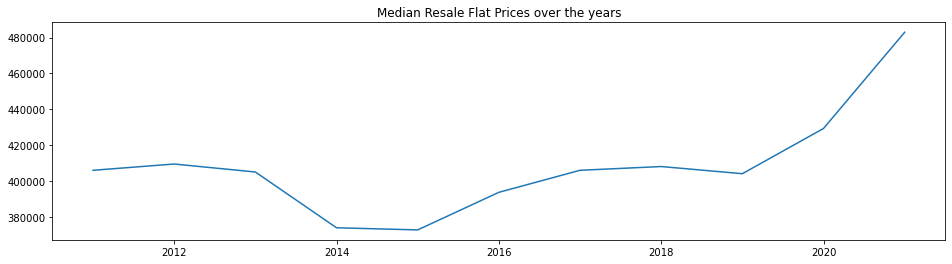

In [37]:
plt.figure(figsize=(16, 4))
plt.plot(df_years[('resale_price_adjusted', 'median')])
plt.title('Median Resale Flat Prices over the years')

#### The dip after 2013 was likely due to the cooling measures introduced in 2013. The recent increase in resale flat prices is likely due to the pandemic. 

#### When the coronavirus swept through workers' dormitories in 2020, construction activities came to a halt for months. Although the construction at some HDB BTO projects have resumed, the completion dates are still expected to be delayed.

#### As a result, some homebuyers turned to the HDB resale market, leading to an increase in the demand and prices of resale flats.

### 4.1.2 Minimum resale prices

Text(0.5, 1.0, 'Minimum Resale Flat Prices over the years')

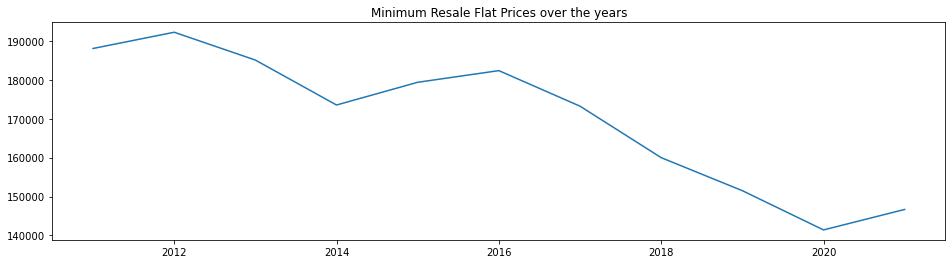

In [38]:
plt.figure(figsize=(16, 4))
plt.plot(df_years[('resale_price_adjusted', 'min')])
plt.title('Minimum Resale Flat Prices over the years')

#### I want to find out if the resale flats with the lowest prices are of a certain flat type.

In [39]:
# take a look at year 2020

df_2020 = df_resale[df_resale['year'] == 2020]
df_2020

# the minimum resale price for each area, are they the same flat type?

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,mth,estimated_storey,remaining_lease_adjusted,adjust_inflation,resale_price_adjusted
179081,2020-01,ANG MO KIO,3 ROOM,208,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,265000.0,55 years 07 months,2020,1,5,55,1.01,267650.0
179082,2020-01,ANG MO KIO,3 ROOM,307C,ANG MO KIO AVE 1,19 TO 21,70.0,Model A,2012,470000.0,91 years 08 months,2020,1,20,91,1.01,474700.0
179083,2020-01,ANG MO KIO,3 ROOM,319,ANG MO KIO AVE 1,01 TO 03,73.0,New Generation,1977,230000.0,56 years 04 months,2020,1,2,56,1.01,232300.0
179084,2020-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,280000.0,55 years 03 months,2020,1,5,55,1.01,282800.0
179085,2020-01,ANG MO KIO,3 ROOM,556,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,220000.0,59 years 01 month,2020,1,8,59,1.01,222200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202409,2020-12,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,560000.0,66 years 08 months,2020,12,5,67,1.01,565600.0
202410,2020-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,01 TO 03,145.0,Apartment,1988,540000.0,66 years 09 months,2020,12,2,67,1.01,545400.0
202411,2020-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,13 TO 15,142.0,Apartment,1987,638000.0,66 years,2020,12,14,66,1.01,644380.0
202412,2020-12,YISHUN,EXECUTIVE,834,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,683500.0,66 years 02 months,2020,12,11,67,1.01,690335.0


In [40]:
sorted_2020 = df_2020.sort_values('resale_price_adjusted', ascending = False)
grouped_2020 = sorted_2020.groupby('town')

In [41]:
for town, group in grouped_2020:
    print('-' * len(town))
    print(town)
    print('-' * len(town))
    print(group[['flat_type', 'resale_price_adjusted']])

----------
ANG MO KIO
----------
        flat_type  resale_price_adjusted
185038  EXECUTIVE             1040300.00
197696     5 ROOM             1018976.88
185481     5 ROOM              980596.88
200016     5 ROOM              969600.00
200017     5 ROOM              959500.00
...           ...                    ...
187817     2 ROOM              199980.00
187815     2 ROOM              199980.00
185378     2 ROOM              197960.00
180992     2 ROOM              193920.00
187871     3 ROOM              175740.00

[997 rows x 2 columns]
-----
BEDOK
-----
        flat_type  resale_price_adjusted
188061  EXECUTIVE               898900.0
200135     5 ROOM               878700.0
192926     5 ROOM               864560.0
192953  EXECUTIVE               863550.0
192914     5 ROOM               853450.0
...           ...                    ...
185495     2 ROOM               202000.0
182748     3 ROOM               202000.0
190373     2 ROOM               198970.0
182731     2 ROOM      

In [42]:
# take a look at year 2011

df_2011 = df_resale[df_resale['year'] == 2011]
sorted_2011 = df_2011.sort_values('resale_price_adjusted', ascending = False)
grouped_2011 = sorted_2011.groupby('town')

for town, group in grouped_2011:
    print('-' * len(town))
    print(town)
    print('-' * len(town))
    print(group[['flat_type', 'resale_price_adjusted']])

----------
ANG MO KIO
----------
       flat_type  resale_price_adjusted
7948   EXECUTIVE              806850.00
20795  EXECUTIVE              792000.00
20793     5 ROOM              787050.00
20794     5 ROOM              772200.00
15664     5 ROOM              770109.12
...          ...                    ...
0         2 ROOM              227700.00
13834     2 ROOM              227700.00
5871      2 ROOM              221760.00
13833     2 ROOM              220770.00
1         2 ROOM              217800.00

[1127 rows x 2 columns]
-----
BEDOK
-----
       flat_type  resale_price_adjusted
10009  EXECUTIVE               811800.0
12058  EXECUTIVE               732699.0
20884     5 ROOM               712800.0
8049      5 ROOM               707850.0
8048      5 ROOM               683100.0
...          ...                    ...
7950      2 ROOM               222750.0
126       2 ROOM               221760.0
9900      2 ROOM               214335.0
2212      2 ROOM               209880.0
125 

In [43]:
df_2021[df_2021['flat_type'] == '2 ROOM'].count()

month                  1723
town                   1723
flat_type              1723
block                  1723
street_name            1723
storey_range           1723
floor_area_sqm         1723
flat_model             1723
lease_commence_date    1723
remaining_lease        1723
resale_price           1723
dtype: int64

In [44]:
df_2011[df_2011['flat_type'] == '2 ROOM'].count()

month                       253
town                        253
flat_type                   253
block                       253
street_name                 253
storey_range                253
floor_area_sqm              253
flat_model                  253
lease_commence_date         253
resale_price                253
remaining_lease               0
year                        253
mth                         253
estimated_storey            253
remaining_lease_adjusted    253
adjust_inflation            253
resale_price_adjusted       253
dtype: int64

#### The lower prices could be due to the introduction of 2-room resale flats. It was only in 2006 that HDB began building new two-room flats as part of its Build-to-Order (BTO) exercise. 

#### Up until 2013, two-room BTO flats were launched sparingly. Only senior citizens were able to apply for these flats, which consists of a single bedroom plus living area, bathroom and kitchen.

#### In 2013, a policy change allowed single Singaporeans 35 years old and above to buy two-room BTO flats as first-time applicants in non-mature estates. 

### 4.1.3 Maximum resale prices

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(df_years[('resale_price_adjusted', 'max')])
plt.title('Maximum Resale Flat Prices over the years')

#### In recent years, a growing number of HDB resale flats were transacted at eye-watering prices of 1 million SGD dollars or more. The increase in the number of million-dollar flats was due to several HDB projects located in city fringe areas that reached their five-year MOP and were released into the resale market in 2020.

## 4.2 How floor area affects resale price

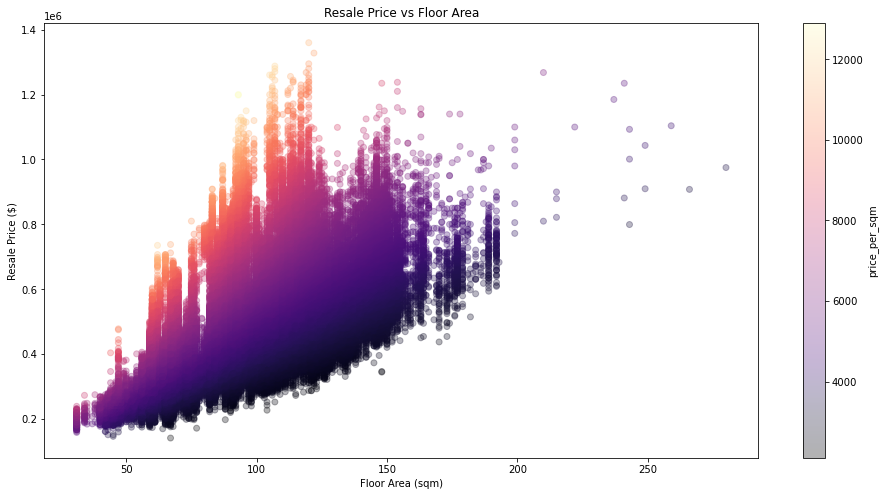

In [45]:
x = df_resale['floor_area_sqm']
y = df_resale['resale_price_adjusted']
z = df_resale['resale_price_adjusted'] / df_resale['floor_area_sqm']

plt.figure(figsize=(16, 8))
plt.title('Resale Price vs Floor Area')
plt.ylabel('Resale Price ($)')
plt.xlabel('Floor Area (sqm)')

plt.scatter(x, y, c=z, cmap='magma', alpha=0.3)
plt.colorbar(label='price_per_sqm')
plt.show()

#### In general, the larger the floor area, the higher the resale price. However, we notice that there are some flats with floor area of around 110 - 120 sqm that have very high price per sqm. 

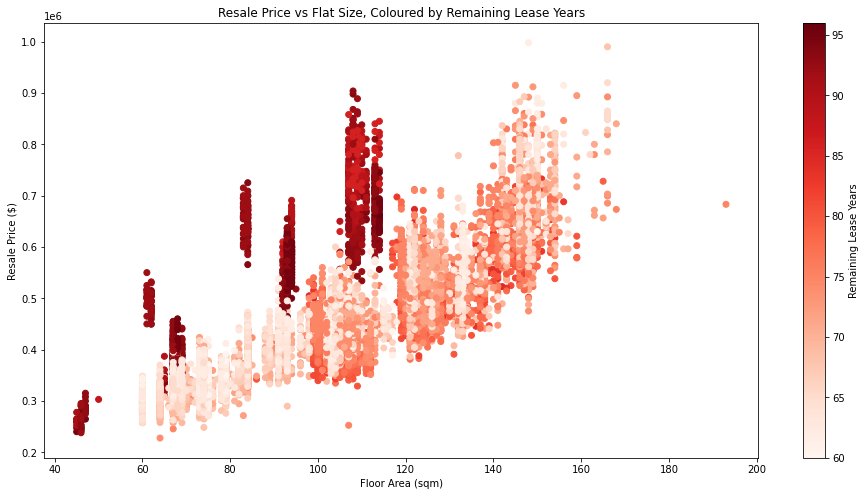

In [46]:
df_tampines = df_resale[df_resale['town'] == 'TAMPINES']

x = df_tampines['floor_area_sqm']
y = df_tampines['resale_price_adjusted']
z = df_tampines['remaining_lease_adjusted']

plt.figure(figsize=(16, 8))
plt.title('Resale Price vs Flat Size, Coloured by Remaining Lease Years')
plt.scatter(x, y, c=z, cmap='Reds')
plt.ylabel('Resale Price ($)')
plt.xlabel('Floor Area (sqm)')
plt.colorbar(label='Remaining Lease Years')

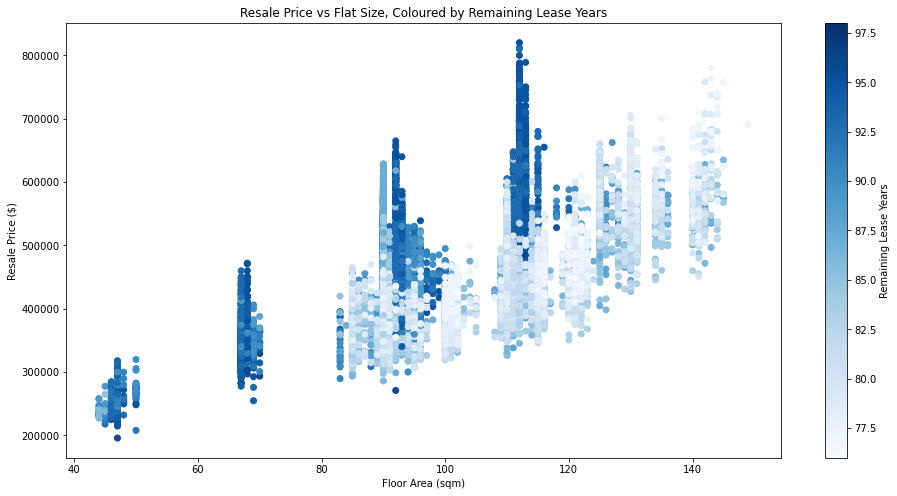

In [47]:
df_sengkang = df_resale[df_resale['town'] == 'SENGKANG']

x = df_sengkang['floor_area_sqm']
y = df_sengkang['resale_price_adjusted']
z = df_sengkang['remaining_lease_adjusted']

plt.figure(figsize=(16, 8))
plt.title('Resale Price vs Flat Size, Coloured by Remaining Lease Years')
plt.scatter(x, y, c=z, cmap='Blues')
plt.ylabel('Resale Price ($)')
plt.xlabel('Floor Area (sqm)')
plt.colorbar(label='Remaining Lease Years')

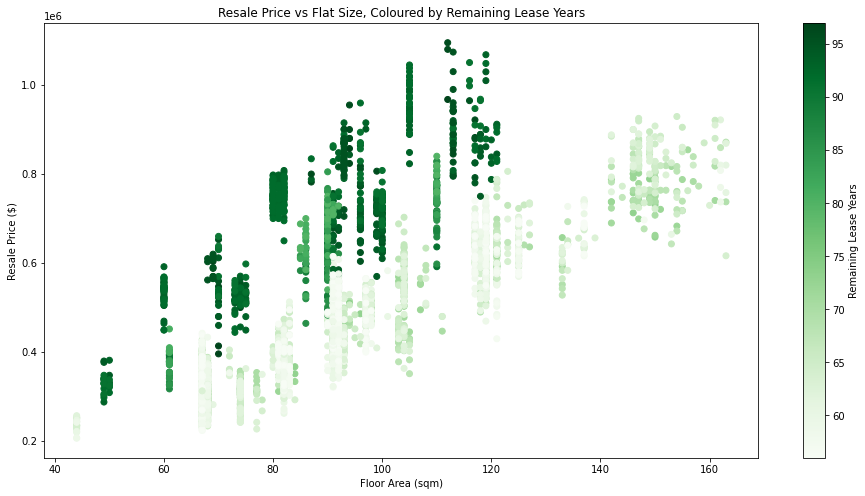

In [48]:
df_clementi = df_resale[df_resale['town'] == 'CLEMENTI']

x = df_clementi['floor_area_sqm']
y = df_clementi['resale_price_adjusted']
z = df_clementi['remaining_lease_adjusted']

plt.figure(figsize=(16, 8))
plt.title('Resale Price vs Flat Size, Coloured by Remaining Lease Years')
plt.scatter(x, y, c=z, cmap='Greens')
plt.ylabel('Resale Price ($)')
plt.xlabel('Floor Area (sqm)')
plt.colorbar(label='Remaining Lease Years')

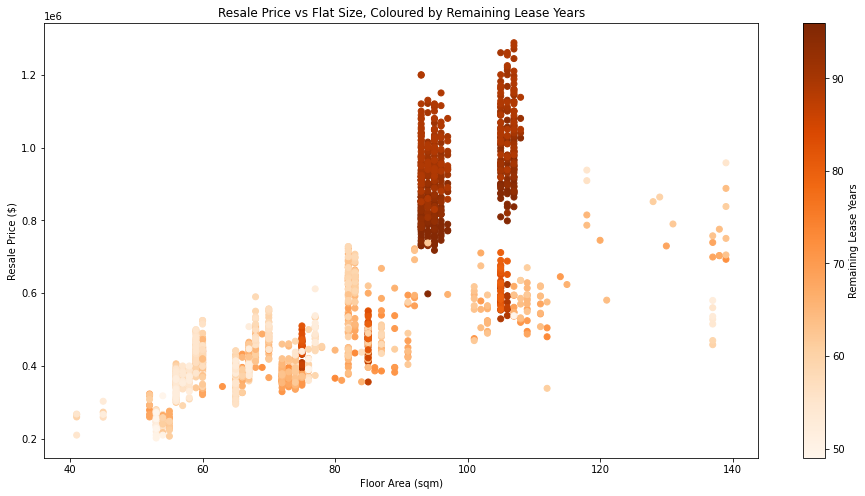

In [49]:
df_central = df_resale[df_resale['town'] == 'CENTRAL AREA']

x = df_central['floor_area_sqm']
y = df_central['resale_price_adjusted']
z = df_central['remaining_lease_adjusted']

plt.figure(figsize=(16, 8))
plt.title('Resale Price vs Flat Size, Coloured by Remaining Lease Years')
plt.scatter(x, y, c=z, cmap='Oranges')
plt.ylabel('Resale Price ($)')
plt.xlabel('Floor Area (sqm)')
plt.colorbar(label='Remaining Lease Years')

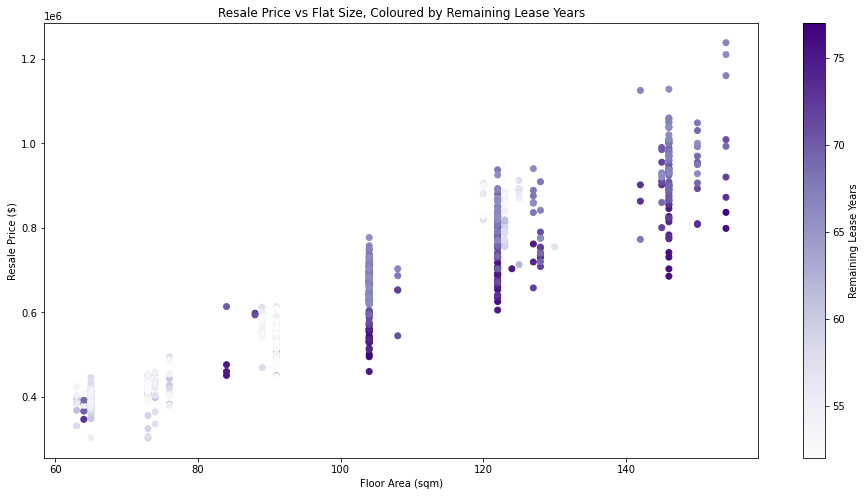

In [50]:
df_bt = df_resale[df_resale['town'] == 'BUKIT TIMAH']

x = df_bt['floor_area_sqm']
y = df_bt['resale_price_adjusted']
z = df_bt['remaining_lease_adjusted']

plt.figure(figsize=(16, 8))
plt.title('Resale Price vs Flat Size, Coloured by Remaining Lease Years')
plt.scatter(x, y, c=z, cmap='Purples')
plt.ylabel('Resale Price ($)')
plt.xlabel('Floor Area (sqm)')
plt.colorbar(label='Remaining Lease Years')

#### While resale flats with larger floor area are typically more expensive, I note that for some areas like Tampines, Clementi, Sengkang and the Central Area, the newer flats (higher remaining lease years) with floor area of about 110 sqm can be as expensive as those of larger floor area, or even more expensive than them. For Bukit Timah, some older flats can still be more expensive.

## 4.3 How town affects resale prices

Text(0.5, 1.0, 'Median Resale Price for Different Towns')

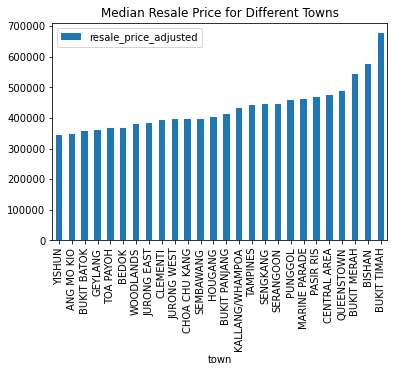

In [51]:
df_town = df_resale[['resale_price_adjusted']].groupby(df_resale['town']).agg({'resale_price_adjusted':'median'})

df_town.sort_values(['resale_price_adjusted']).plot(kind='bar')

plt.title('Median Resale Price for Different Towns')

#### Flats in the city fringe areas have higher median resale prices compared to the other areas. 

#### I also want to find out if these areas have greater increase in resale prices in recent years, so I will compare the median prices in 2019 against those in 2021. 

In [52]:
df_2019 = df_resale[df_resale['year'] == 2019]
df_2019

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,mth,estimated_storey,remaining_lease_adjusted,adjust_inflation,resale_price_adjusted
156895,2019-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,01 TO 03,67.0,New Generation,1978,230000.0,58 years,2019,1,2,58,1.01,232300.00
156896,2019-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,01 TO 03,60.0,Improved,1986,235000.0,66 years,2019,1,2,66,1.01,237350.00
156897,2019-01,ANG MO KIO,3 ROOM,440,ANG MO KIO AVE 10,04 TO 06,67.0,New Generation,1979,238000.0,59 years,2019,1,5,59,1.01,240380.00
156898,2019-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,61.0,Improved,1986,240000.0,66 years 01 month,2019,1,11,66,1.01,242400.00
156899,2019-01,ANG MO KIO,3 ROOM,637,ANG MO KIO AVE 6,01 TO 03,68.0,New Generation,1980,240000.0,60 years 08 months,2019,1,2,60,1.01,242400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179076,2019-12,YISHUN,EXECUTIVE,326,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,580000.0,67 years 07 months,2019,12,5,68,1.01,585800.00
179077,2019-12,YISHUN,EXECUTIVE,326,YISHUN RING RD,07 TO 09,146.0,Maisonette,1988,565000.0,67 years 07 months,2019,12,8,68,1.01,570650.00
179078,2019-12,YISHUN,EXECUTIVE,608,YISHUN ST 61,01 TO 03,164.0,Apartment,1992,633000.0,71 years 06 months,2019,12,2,72,1.01,639330.00
179079,2019-12,YISHUN,EXECUTIVE,604,YISHUN ST 61,10 TO 12,164.0,Apartment,1992,788888.0,71 years 06 months,2019,12,11,72,1.01,796776.88


In [53]:
df_2021 = df_resale[df_resale['year'] == 2021]
df_2021

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,mth,estimated_storey,remaining_lease_adjusted,adjust_inflation,resale_price_adjusted
202414,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,225000.0,64 years 01 month,2021,1,8,64,1.0,225000.0
202415,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,01 TO 03,45.0,Improved,1986,211000.0,64 years 01 month,2021,1,2,64,1.0,211000.0
202416,2021-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,275888.0,54 years 04 months,2021,1,5,54,1.0,275888.0
202417,2021-01,ANG MO KIO,3 ROOM,223,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1978,316800.0,56 years 01 month,2021,1,8,56,1.0,316800.0
202418,2021-01,ANG MO KIO,3 ROOM,223,ANG MO KIO AVE 1,10 TO 12,67.0,New Generation,1978,305000.0,56 years,2021,1,11,56,1.0,305000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231502,2021-12,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,690000.0,65 years,2021,12,11,65,1.0,690000.0
231503,2021-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,655000.0,64 years 10 months,2021,12,11,65,1.0,655000.0
231504,2021-12,YISHUN,EXECUTIVE,877,YISHUN ST 81,01 TO 03,142.0,Apartment,1987,738000.0,65 years 01 month,2021,12,2,65,1.0,738000.0
231505,2021-12,YISHUN,EXECUTIVE,824,YISHUN ST 81,04 TO 06,146.0,Maisonette,1987,755000.0,65 years,2021,12,5,65,1.0,755000.0


In [54]:
# compute the median prices for each town in 2019

df_2019_town = df_2019[['resale_price_adjusted']].groupby(df_2019['town']).agg({'resale_price_adjusted':'median'})
df_2019_town

,resale_price_adjusted
town,
ANG MO KIO,328250.00
BEDOK,353500.00
BISHAN,614080.00
BUKIT BATOK,354005.00
BUKIT MERAH,587258.44
BUKIT PANJANG,421170.00
BUKIT TIMAH,732250.00
CENTRAL AREA,517120.00
CHOA CHU KANG,368650.00


In [59]:
# compute the median prices for each town in 2019

df_2021_town = df_2021[['resale_price_adjusted']].groupby(df_2021['town']).agg({'resale_price_adjusted':'median'})
df_2021_town

,resale_price_adjusted
town,
ANG MO KIO,375000.0
BEDOK,430944.5
BISHAN,640444.0
BUKIT BATOK,428000.0
BUKIT MERAH,630000.0
BUKIT PANJANG,475000.0
BUKIT TIMAH,703300.0
CENTRAL AREA,665000.0
CHOA CHU KANG,477000.0


In [56]:
# put the 2019 and 2021 data together

df_19and21 = pd.merge(df_2019_town, df_2021_town, on = 'town')
df_19and21.columns = ['resale_price_2019', 'resale_price_2021']
df_19and21

,resale_price_2019,resale_price_2021
town,,
ANG MO KIO,328250.00,375000.0
BEDOK,353500.00,430944.5
BISHAN,614080.00,640444.0
BUKIT BATOK,354005.00,428000.0
BUKIT MERAH,587258.44,630000.0
BUKIT PANJANG,421170.00,475000.0
BUKIT TIMAH,732250.00,703300.0
CENTRAL AREA,517120.00,665000.0
CHOA CHU KANG,368650.00,477000.0


In [57]:
# calculate percent change and store in new column

df_19and21['percent_change'] = ((df_19and21['resale_price_2021'] - df_19and21['resale_price_2019'])/ df_19and21['resale_price_2019']) * 100
df_19and21

,resale_price_2019,resale_price_2021,percent_change
town,,,
ANG MO KIO,328250.00,375000.0,14.242193
BEDOK,353500.00,430944.5,21.907921
BISHAN,614080.00,640444.0,4.293252
BUKIT BATOK,354005.00,428000.0,20.902247
BUKIT MERAH,587258.44,630000.0,7.278152
BUKIT PANJANG,421170.00,475000.0,12.781062
BUKIT TIMAH,732250.00,703300.0,-3.953568
CENTRAL AREA,517120.00,665000.0,28.596844
CHOA CHU KANG,368650.00,477000.0,29.391021


<AxesSubplot:xlabel='town'>

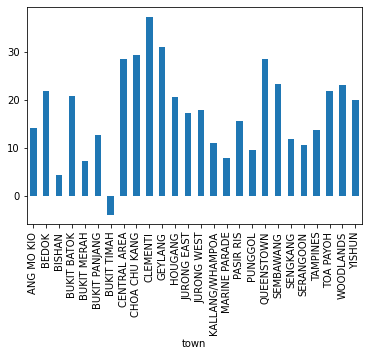

In [58]:
df_19and21['percent_change'].plot(kind='bar')

#### There's a negative percent change, which makes it difficult to compare. I will do normalisation so all values end up ranging between 0 and 1 and it will be easier to make comparisons. 

In [60]:
min_max_scaler = preprocessing.MinMaxScaler()
df_19and21['scaled_percent'] = min_max_scaler.fit_transform(df_19and21[['percent_change']])
df_19and21_sorted = df_19and21.sort_values(['scaled_percent'])

<AxesSubplot:xlabel='town'>

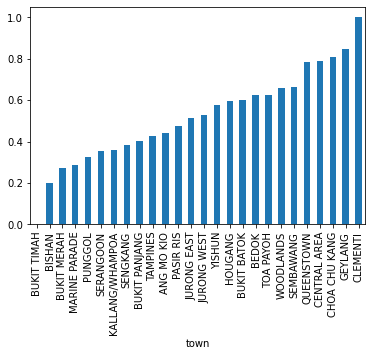

In [61]:
df_19and21_sorted['scaled_percent'].plot(kind='bar')

#### When I looked at the data from 2011 to 2021 earlier, I note that Bukit Timah has the highest median resale price. From the plot above, I can see that Bukit Timah resale prices did not change a lot from 2019 to 2021. If we look at the table, there is a slight drop in price. Bukit Timah resale flats could have always been expensive. 

#### From the table and the plot, I see that Clementi has the largest percent increase in price. In recent years, many flats in Clementi have been sold for over a million dollars. 

## 4.4 How flat type affects prices

Text(0.5, 1.0, 'Median Resale Price for Different Flat Types')

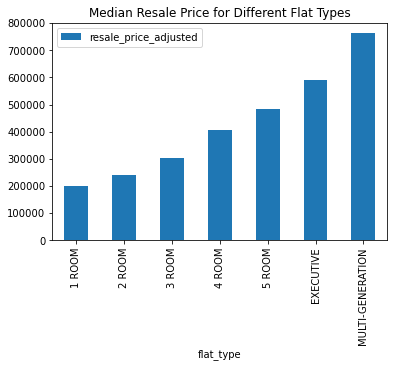

In [62]:
df_type = df_resale[['resale_price_adjusted']].groupby(df_resale['flat_type']).agg({'resale_price_adjusted':'median'})

df_type.sort_values(['resale_price_adjusted']).plot(kind='bar')

plt.title('Median Resale Price for Different Flat Types')

#### It is not surprising to see that the median resale prices increase with the number of rooms. Executive apartments are more spacious and comes with a study room and a balcony. Multi Generation flats are specifically designed for multigenerational families and comes with two master bedrooms, each with their own toilets. 

## 4.5 How storey affects prices

Text(0.5, 1.0, 'Median Resale Price for Different Storeys')

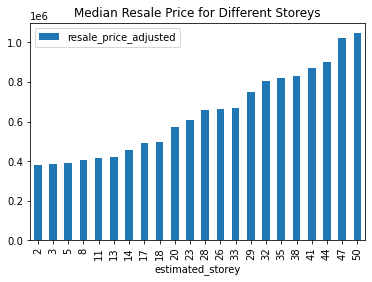

In [63]:
df_storey = df_resale[['resale_price_adjusted']].groupby(df_resale['estimated_storey']).agg({'resale_price_adjusted':'median'})

df_storey.sort_values(['resale_price_adjusted']).plot(kind='bar')

plt.title('Median Resale Price for Different Storeys')

#### In general, the higher level resale flats are sold at higher prices.

# 5. What can we explore further?

#### In general, I note that larger floor area and higher storeys can mean higher resale prices. However, I also note that newer flats with smaller floor area can be sold at prices comparable to those with larger floor areas. Hence, the remaining lease years is also be an important factor when it comes to determining the price. However, when it comes to town like Bukit Timah, the older flats were still sold at higher prices. 

#### Having a better understanding of the different towns and the amenities located with the towns will also be helpful in understanding resale prices. It will also help us understand why certain towns are experiencing greater price increase in the recent years. 